In [275]:
%matplotlib inline
import numpy as np
import pandas as pd
#import seaborn as sns
#from keras.layers import Dense
import matplotlib.pyplot as plt
#from keras.optimizers import SGD
#from keras.models import Sequential
from sklearn.preprocessing import MinMaxScaler
#from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

In [79]:
maxlen = 60
step = 3

sentences = []

next_chars = []

for i in range(0, len(text) - maxlen, step):
    sentences.append(text[i: i + maxlen])
    next_chars.append(text[i + maxlen])

print('Number of sequences:', len(sentences))

chars = sorted(list(set(text)))
print('Unique characters:', len(chars))
char_indices = dict((char, chars.index(char)) for char in chars)

print('Vectorization...')
x = np.zeros((len(sentences), maxlen, len(chars)), dtype=np.bool)
y = np.zeros((len(sentences), len(chars)), dtype=np.bool)
for i, sentence in enumerate(sentences):
    for t, char in enumerate(sentence):
        x[i, t, char_indices[char]] = 1
    y[i, char_indices[next_chars[i]]] = 1

Number of sequences: 200281
Unique characters: 59
Vectorization...


In [149]:
from keras import layers

model = keras.models.Sequential()
model.add(layers.LSTM(128, input_shape=(maxlen,1)))
model.add(layers.Dense(1))
optimizer = keras.optimizers.RMSprop(lr=0.01)
model.compile(loss='mse', optimizer=optimizer)
model.fit(x, y, batch_size=128, epochs=2)

Epoch 1/2
529/529 [==============================] - 9s - loss: 0.0357      
Epoch 2/2
529/529 [==============================] - 8s - loss: 6.7867e-08     


In [22]:
X = pd.read_csv("//bvt-fs-01//Users$//jwwilson//Documents//Historical//DAT_MT_EURUSD_M1_201801.csv",header=None)
X.columns = ["Date","Time","Open","High","Low","Close","unused"]

In [88]:
#create segments "sentences"
maxlen = 360
step = 60
close = X[["Close"]].values
returns = [1]
returns = [0]
for j in range(1,len(close)):
    returns.append(close[j]-close[j-1])
returns = np.array(returns)
    
sentences = []
next_chars = []

for i in range(0, len(returns) - maxlen, step):
    sentences.append(returns[i: i + maxlen])
    next_chars.append(returns[i + maxlen])

print('Number of sequences:', len(sentences))

print('Vectorization...')
x = np.array(sentences)
y = np.array(next_chars)


Number of sequences: 529
Vectorization...


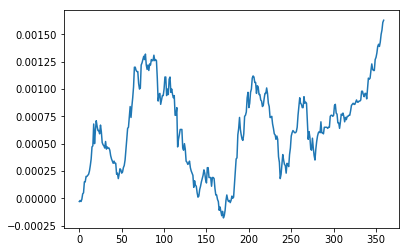

In [69]:
plt.plot(np.cumsum(x[2,:]))

In [50]:
returns = [0]
for j in range(1,len(close)):
    returns.append(close[j]-close[j-1])
returns = np.array(returns)

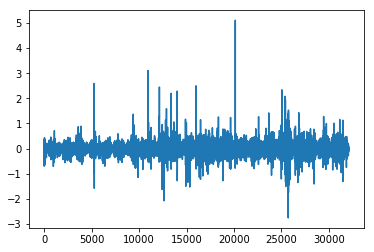

In [52]:
plt.plot(returns*1000)

In [96]:
 model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_7 (LSTM)                (None, 128)               66560     
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 129       
Total params: 66,689
Trainable params: 66,689
Non-trainable params: 0
_________________________________________________________________


In [92]:
x  = x.reshape(x.shape[0],x.shape[1],1)

In [93]:
x.shape

(529, 360, 1)

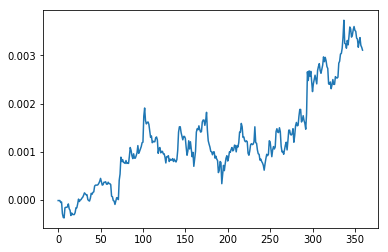

In [104]:
start_index = random.randint(0, len(returns) - maxlen - 1)
generated_text = returns[start_index: start_index + maxlen]
plt.plot(np.cumsum(generated_text))

In [152]:
start_index = random.randint(0, len(returns) - maxlen - 1)
starting_text = returns[start_index: start_index + maxlen]
generated_text = starting_text
for i in range(100):
    model_input = (generated_text[i:]).reshape(1,starting_text.shape[0],1)
    next_char = model.predict(model_input, verbose=0)[0]
    generated_text = np.append(generated_text,next_char)



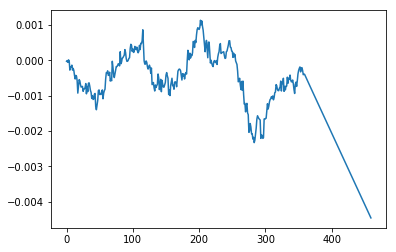

In [153]:
plt.plot((np.cumsum(generated_text)))

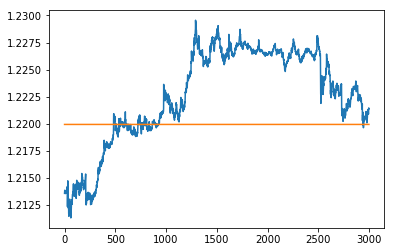

In [269]:
maxlen = 1000
start_index = random.randint(0, len(returns) - maxlen - 1)
starting_text = close[start_index: start_index + maxlen]
h1 = np.histogram(starting_text,200)
max_r = (h1[1])[np.argmax(h1[0])]
xx = range(0,maxlen*3)
full_text = close[start_index: start_index + 3*maxlen]
resistance = np.zeros(3*maxlen)
for i in range(0,3*maxlen):
    resistance[i] = max_r
plt.plot(xx,full_text,xx,resistance)  

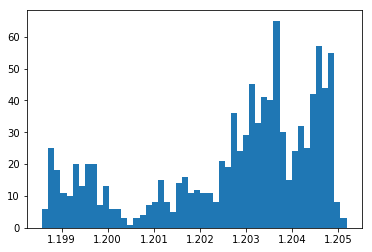

In [248]:
h1 = plt.hist(starting_text,bins = 50)

In [232]:
h1 = np.histogram(starting_text,50)

In [233]:
h1


(array([ 33,  88,  91,  93,  81,  30,  38,  82, 105,  86,  48,  44,  34,
         39,  35,  20,  10,  12,   3,   1,   6,   5,   1,   0,   1,   2,
          1,   0,   0,   0,   0,   0,   0,   0,   0,   6,   2,   5,   3,
          3,  10,  15,  16,  29,  50,  28,  19,  14,   7,   4], dtype=int64),
 array([ 1.20283  ,  1.2030458,  1.2032616,  1.2034774,  1.2036932,
         1.203909 ,  1.2041248,  1.2043406,  1.2045564,  1.2047722,
         1.204988 ,  1.2052038,  1.2054196,  1.2056354,  1.2058512,
         1.206067 ,  1.2062828,  1.2064986,  1.2067144,  1.2069302,
         1.207146 ,  1.2073618,  1.2075776,  1.2077934,  1.2080092,
         1.208225 ,  1.2084408,  1.2086566,  1.2088724,  1.2090882,
         1.209304 ,  1.2095198,  1.2097356,  1.2099514,  1.2101672,
         1.210383 ,  1.2105988,  1.2108146,  1.2110304,  1.2112462,
         1.211462 ,  1.2116778,  1.2118936,  1.2121094,  1.2123252,
         1.212541 ,  1.2127568,  1.2129726,  1.2131884,  1.2134042,  1.21362  ]))

In [615]:
close_train = close[0:15000]
close_test = close[15000:-1]
X_test = []
y_test = []
X_train = []
y_train = []
for j in range(0,14000,10):
    X_test.append(close_test[j:j+100,:].reshape(1,-1))
    y_test.append(close_test[j+100:j+200,:].reshape(1,-1))
    X_train.append(close_train[j:j+100,:].reshape(1,-1))
    y_train.append(close_train[j+100:j+200,:].reshape(1,-1))
X_test = np.array(X_test).reshape(-1,100)    
y_test = np.array(y_test).reshape(-1,100)  
X_train = np.array(X_train).reshape(-1,100)    
y_train = np.array(y_train).reshape(-1,100)

In [550]:
np.array(y_train)

array([[[ 1.20115,  1.20109,  1.20105, ...,  1.20223,  1.20228,  1.20218]],

       [[ 1.20214,  1.20218,  1.20213, ...,  1.20094,  1.20092,  1.20094]],

       [[ 1.20098,  1.20096,  1.20097, ...,  1.20135,  1.20131,  1.20141]],

       ..., 
       [[ 1.22569,  1.22569,  1.22565, ...,  1.22791,  1.22794,  1.22831]],

       [[ 1.22783,  1.22817,  1.22809, ...,  1.22637,  1.22625,  1.22618]],

       [[ 1.22626,  1.22627,  1.22631, ...,  1.22747,  1.22739,  1.22727]]])

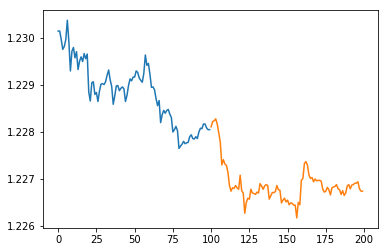

In [336]:
plt.plot(xx1,X_test[5,:],xx2,y_test[5,:])

In [331]:
X_test[3,:]

array([ 1.22455,  1.22485,  1.22475,  1.22487,  1.22533,  1.22573,
        1.22557,  1.22538,  1.22567,  1.22569,  1.22579,  1.22586,
        1.2258 ,  1.22568,  1.22592,  1.22597,  1.22587,  1.22577,
        1.226  ,  1.2259 ,  1.22598,  1.22607,  1.22612,  1.22632,
        1.22639,  1.22641,  1.22672,  1.22672,  1.22661,  1.22674,
        1.22682,  1.22687,  1.2267 ,  1.22672,  1.2266 ,  1.22671,
        1.22672,  1.2268 ,  1.22689,  1.22692,  1.22689,  1.22666,
        1.2267 ,  1.22666,  1.22661,  1.22654,  1.22635,  1.22661,
        1.22661,  1.22657,  1.22685,  1.22692,  1.22695,  1.22745,
        1.2274 ,  1.22728,  1.2273 ,  1.22733,  1.22771,  1.22798,
        1.22806,  1.22798,  1.22797,  1.22789,  1.22782,  1.22786,
        1.22761,  1.2275 ,  1.22742,  1.22761,  1.22743,  1.22753,
        1.22746,  1.22751,  1.22734,  1.22733,  1.22714,  1.22719,
        1.22726,  1.22716,  1.22722,  1.22724,  1.2272 ,  1.22723,
        1.22711,  1.22716,  1.22701,  1.22692,  1.22688,  1.22

In [337]:
 a = X_train[12,:]

In [349]:
c = np.corrcoef(X_train[2,:],a)

In [352]:
c[0,1]

-0.84997271549854536

In [611]:
a = X_test[209,:]
b = y_test[209,:]   
c = []
for j in range(0,75):
    corrcoeffj =np.corrcoef(X_train[j,:],a)
    c.append(corrcoeffj[0,1])
    
    

In [612]:
kmax = np.argmax(c)
c[kmax]

0.70439318541192453

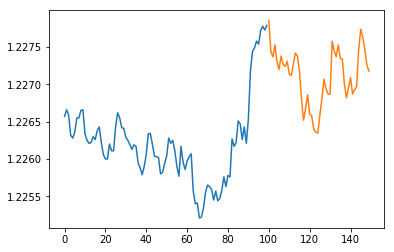

In [613]:
plt.plot(xx1,a,range(100,150),b[0:50])

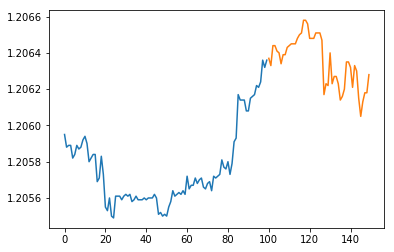

In [614]:
plt.plot(xx1,X_train[kmax,:],range(100,150),y_train[kmax,0:50])

In [500]:
y_train[46,:].shape

(100,)

In [383]:
xx2

range(100, 200)

In [564]:
np.argmax(maxcorrs)

98

In [616]:
maxcorrs=[]
test_returns = []
train_returns = []
for j in range(0,X_test.shape[0]):
    segment_a = X_test[j,:]
    segment_b = y_test[j,0:50]
    #Now get correlations with all training data set
    c = []
    for i in range(0,X_train.shape[0]):
        corrcoeffj =np.corrcoef(X_train[i,:],segment_a)
        c.append(corrcoeffj[0,1])
    kmax = np.argmax(c) #index of max correlation
    kval = np.max(c)  #value of max correlation
    test_returns.append(segment_b[-1]/segment_b[0])
    matching_segment_b =  y_train[kmax,0:50]
    train_returns.append(matching_segment_b[-1]/matching_segment_b[0])
    maxcorrs.append(kval)
test_returns = np.array(test_returns)
maxcorrs = np.array(maxcorrs)
train_returns = np.array(train_returns)

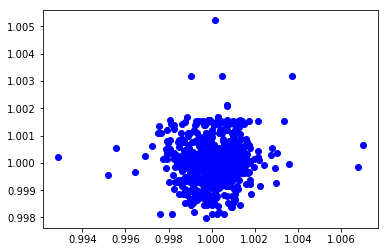

In [597]:
plt.plot(test_returns,train_returns,'bo')

In [598]:
np.corrcoef(test_returns[maxcorrs>.92],train_returns[maxcorrs>0.92])

array([[ 1.        ,  0.05601826],
       [ 0.05601826,  1.        ]])

In [464]:
test_returns[test_returns>0]

TypeError: unorderable types: list() > int()

In [465]:
test_returns>0

TypeError: unorderable types: list() > int()

In [462]:
C = np.array([123,188,190,99,77,88,100])
A = np.array([4,7,2,8,6,9,5])
R = C[A<=5]
print(R)

[123 190 100]


In [466]:
plt.plot()

list